In [1]:
# Importing Libraries and reading in data


import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data
df = pd.read_csv(r'C:\Users\flipp\Downloads\movies.csv\movies.csv')

In [2]:
# Enables looking at all the data
# Note: For Github, I have used .head() where possible to limit the size of the notebook

pd.set_option('display.max_rows', None)

In [3]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Checking for any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Taking a look at the data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Cleaning up date, changing data types, replacing missing values

df['rating'] = df['rating'].fillna('Not Rated')
df['released'] = df['released'].fillna('January 1, 0000 (Country)')
df['score'] = df['score'].fillna(0.0)
df['votes'] = df['votes'].fillna(0).astype(int)
df['writer'] = df['writer'].fillna('Jane Doe')
df['star'] = df['star'].fillna('John Doe')
df['country'] = df['country'].fillna('Country')
df['budget'] = df['budget'].fillna(0).astype(int)
df['gross'] = df['gross'].fillna(0).astype(int)
df['company'] = df['company'].fillna('company')
df['runtime'] = df['runtime'].fillna(0).astype(int)

In [7]:
# Removing (County) from the end of release date

df['releaseDate'] = df['released'].str.split('(').str[0]

In [8]:
# Creating the "year correct" column, converting to numeric, correcting for Nan

df['correctYear'] = df['released'].str.split(', ').str[-1].astype(str).str[:4]

df['correctYear'] = pd.to_numeric(df['correctYear'],errors='coerce').fillna(0.0).astype(int)

In [9]:
# Ordering and checking on the data

df.sort_values(by = 'gross').head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseDate,correctYear
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194,"December 19, 1997",1997
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162,"December 18, 2009",2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181,"April 26, 2019",2019
7667,Tee em el,Not Rated,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102,"August 19, 2020",2020
201,Longshot,TV-PG,Comedy,1981,1981 (United States),5.1,101,E.W. Swackhamer,Barry Rosen,Leif Garrett,United States,0,0,Greentree,100,1981,1981


In [10]:
# Dropping those first 3 rows due to their gross values; no movie has a negative gross

df.drop(3045, axis=0, inplace=True)
df.drop(5445, axis=0, inplace=True)
df.drop(7445, axis=0, inplace=True)

df.sort_values(by = 'gross').head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseDate,correctYear
7667,Tee em el,Not Rated,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102,"August 19, 2020",2020
980,Malcolm,PG-13,Comedy,1986,"November 5, 1986 (United States)",7.1,2100,Nadia Tass,David Parker,Colin Friels,Australia,0,0,Cascade Films,85,"November 5, 1986",1986
261,Frances,R,Biography,1982,"March 11, 1983 (Australia)",7.3,7300,Graeme Clifford,Eric Bergren,Jessica Lange,United States,0,0,Brooksfilms,140,"March 11, 1983",1983
1822,The Shrimp on the Barbie,PG-13,Comedy,1990,"August 31, 1990 (United States)",5.7,1200,Director,Grant Morris,Cheech Marin,Australia,0,0,Unity Pictures,90,"August 31, 1990",1990
460,Young Warriors,R,Action,1983,"August 28, 1983 (United States)",4.7,460,Lawrence David Foldes,Russell W. Colgin,Ernest Borgnine,United States,0,0,Star Cinema,105,"August 28, 1983",1983


<Axes: xlabel='budget', ylabel='gross'>

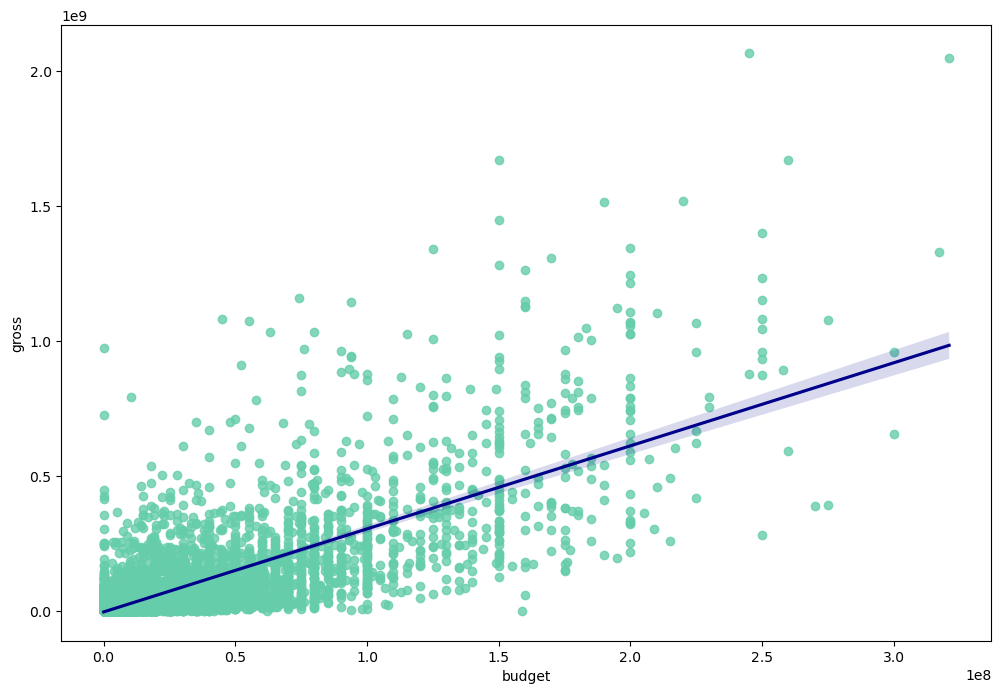

In [11]:
# Hypothesis: Budget is highly correlated with gross
# Checking this with a scatterplot first, then a heatmap

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"mediumaquamarine"}, line_kws={"color":"darkblue"})

Text(120.72222222222221, 0.5, 'Movie Feature')

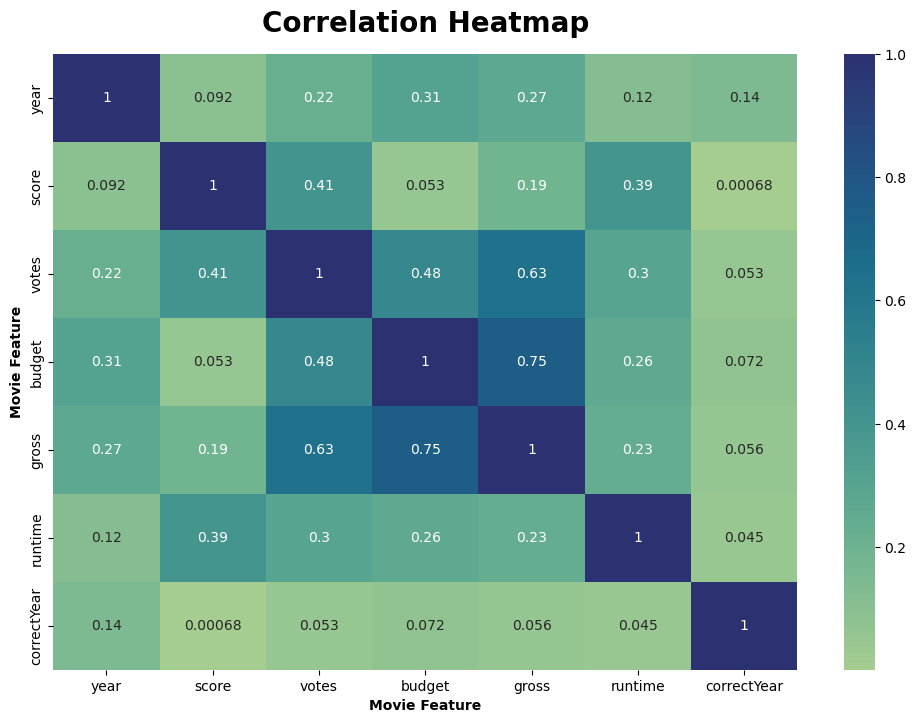

In [12]:
# Making a heatmap 
# Budget is indeed highly correlated with gross

sns.heatmap(df.corr(numeric_only = True), annot=True,cmap='crest')
plt.title('Correlation Heatmap', pad='16.0',fontweight='bold',fontsize='20')
plt.xlabel('Movie Feature', fontweight='bold')
plt.ylabel('Movie Feature', fontweight='bold')

In [13]:
# Grouping by director to see the average of each numerical field
# In particular, I want to see what directors, if any, get a higher average gross

df.groupby('director').agg({'gross':['count','mean']}).sort_values(by = ('gross','mean'), ascending=False).head()

gross              
              count          mean
director                         
Kyle Balda        2  1.097122e+09
Josh Cooley       1  1.073395e+09
Chris Buck        3  1.059909e+09
Anthony Russo     4  1.011687e+09
Lee Unkrich       2  9.373943e+08

In [14]:
# # Now, I want to export the dataframe as a .xlsx file so I can use SQL to create views

df.to_excel('cleanedMovie.xlsx')